In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdatboii
import seaborn as sns
import mplfinance as mplf

# Get Data

## Event Data

In [2]:
eventCols = ["event", "timestamp", "type", "stablecoin"]

with open("../data/ERC20-stablecoins/event_data.csv") as event_f:
    event_df = pd.read_csv(event_f, encoding='latin-1', nrows=5)

# Parse timestamp if it is unix seconds
event_df["timestamp"] = pd.to_datetime(event_df["timestamp"], unit="s", utc = True)

In [3]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=tokenCols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)
# token_df["amount"] = pd.to_numeric(token_df["amount"])

Get stuff from apr to jun

In [4]:
cutoff_date = pd.Timestamp("2022-06-30", tz="UTC")

token_df = token_df[token_df["datetime"] <= cutoff_date]

Get day by day volume

In [5]:
token_df["date"] = token_df["datetime"].dt.date
daily_volume = (
    token_df
    .groupby("date")["amount"]
    .sum()
    .reset_index()
)

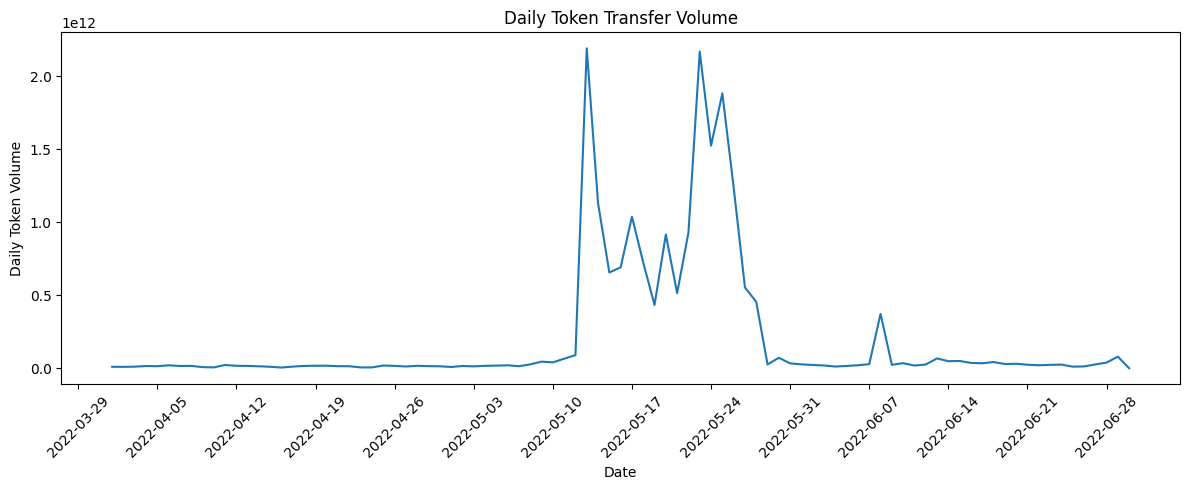

In [6]:

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(daily_volume["date"], daily_volume["amount"])

ax.xaxis.set_major_locator(mdatboii.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdatboii.DateFormatter("%Y-%m-%d"))

ax.set_xlabel("Date")
ax.set_ylabel("Daily Token Volume")
ax.set_title("Daily Token Transfer Volume")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# luna vs other coins

In [7]:
coinCols = [
    "timestamp",
    "open",
    "high",
    "low",
    "close"
]

DAI_df = pd.read_csv("../data/ERC20-stablecoins//price_data/dai_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

PAX_df = pd.read_csv("../data/ERC20-stablecoins//price_data/pax_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USDC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdc_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USDT_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdt_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USTC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/ustc_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

WLUNA_df = pd.read_csv("../data/ERC20-stablecoins//price_data/wluna_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

DAI_df["timestamp"] = pd.to_datetime(DAI_df["timestamp"], unit="s", utc = True)
PAX_df["timestamp"] = pd.to_datetime(PAX_df["timestamp"], unit="s", utc = True)
USDC_df["timestamp"] = pd.to_datetime(USDC_df["timestamp"], unit="s", utc = True)
USDT_df["timestamp"] = pd.to_datetime(USDT_df["timestamp"], unit="s", utc = True)
USTC_df["timestamp"] = pd.to_datetime(USTC_df["timestamp"], unit="s", utc = True)
WLUNA_df["timestamp"] = pd.to_datetime(WLUNA_df["timestamp"], unit="s", utc = True)

cutoff_date = pd.Timestamp("2022-05-22", tz="UTC")
cutfrom_date = pd.Timestamp("2022-04-15", tz="UTC")

DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

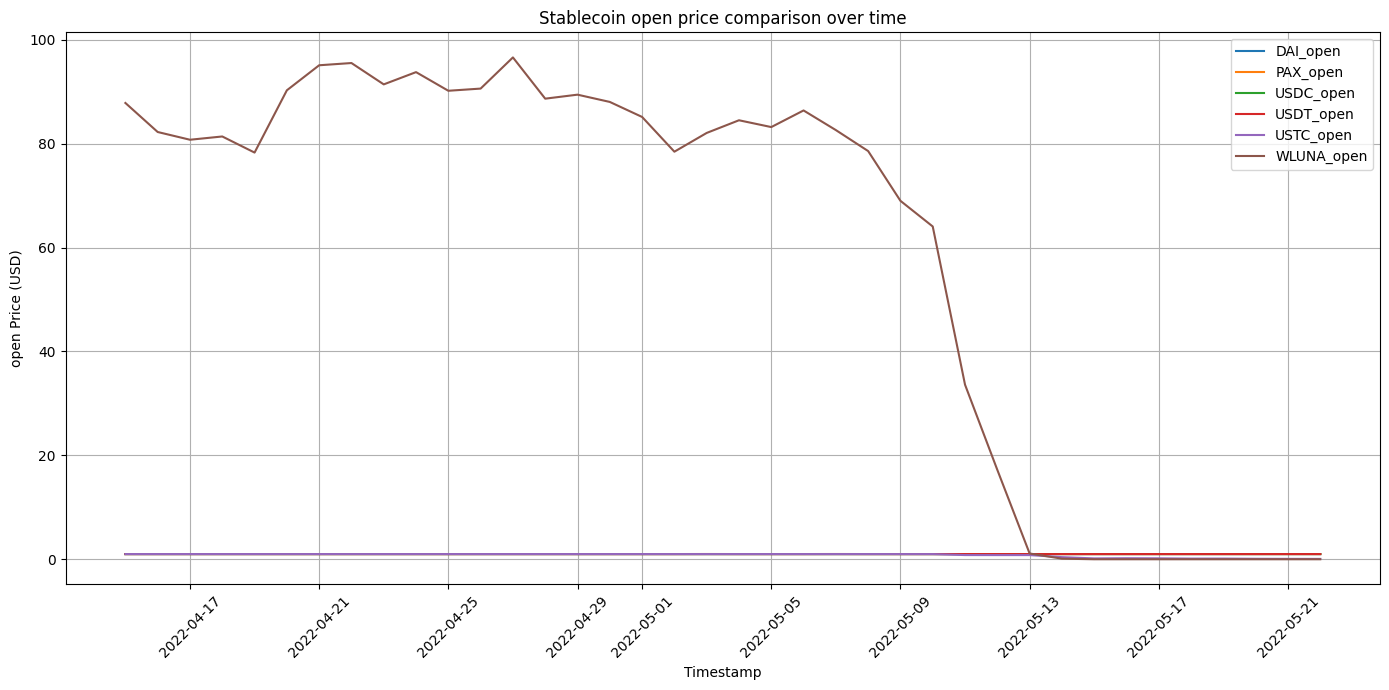

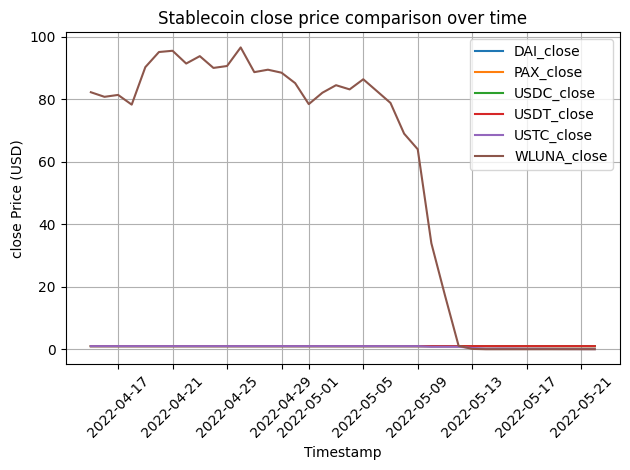

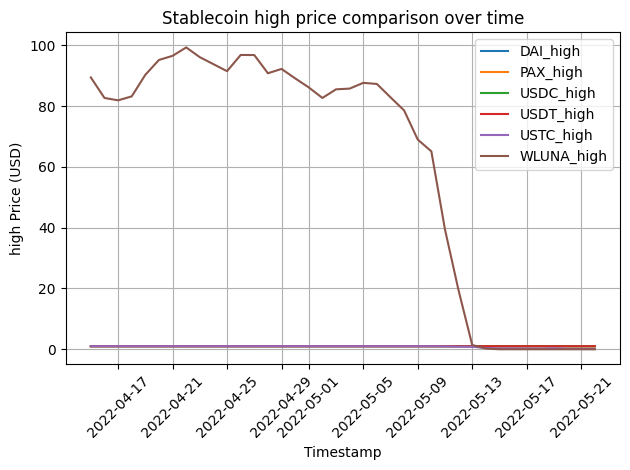

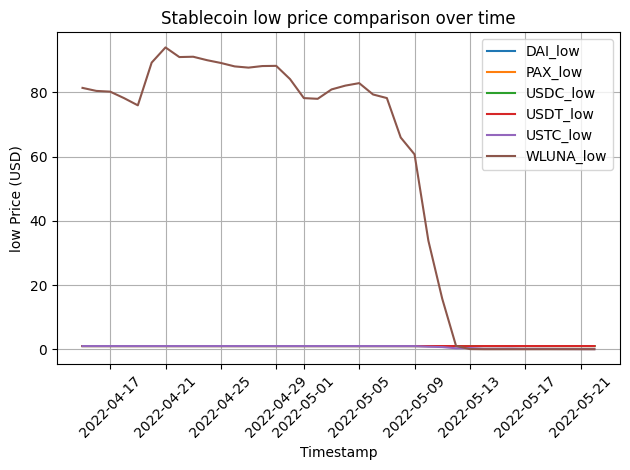

In [8]:
plt.figure(figsize=(14, 7))

vars = ["open", "close", "high", "low"]

for item in vars:
    plt.plot(DAI_df["timestamp"], DAI_df[item], label="DAI_" + item)
    plt.plot(PAX_df["timestamp"], PAX_df[item], label="PAX_" + item)
    plt.plot(USDC_df["timestamp"], USDC_df[item], label="USDC_" + item)
    plt.plot(USDT_df["timestamp"], USDT_df[item], label="USDT_" + item)
    plt.plot(USTC_df["timestamp"], USTC_df[item], label="USTC_" + item)
    plt.plot(WLUNA_df["timestamp"], WLUNA_df[item], label="WLUNA_" + item)

    plt.xlabel("Timestamp")
    plt.ylabel(item + " Price (USD)")
    plt.title("Stablecoin " + item + " price comparison over time")
    plt.legend()
    plt.xticks(rotation = 45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

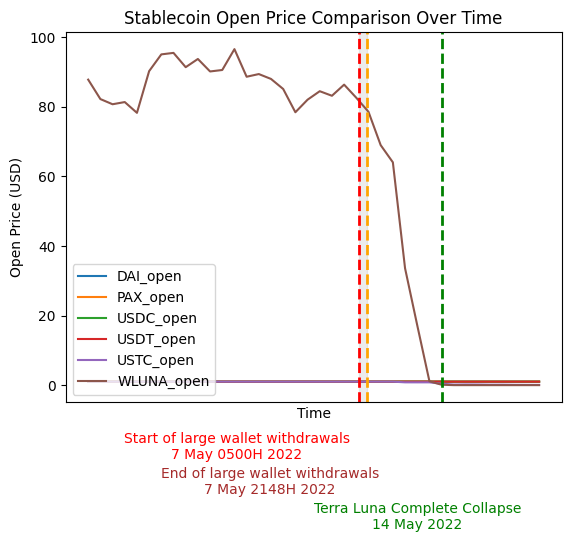

In [9]:
# graph ranges
cutfrom_date = pd.Timestamp("2022-04-15 00:00", tz="UTC")
cutoff_date = pd.Timestamp("2022-05-22 23:59", tz="UTC")

# line dates
startDraw_date = pd.Timestamp("2022-05-07 05:00", tz="UTC")
endDraw_date = pd.Timestamp("2022-05-07 21:48", tz="UTC")
collapse_date = pd.Timestamp("2022-05-14 00:00", tz="UTC")

# trim df
DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

plt.plot(DAI_df["timestamp"], DAI_df["open"], label="DAI_open")
plt.plot(PAX_df["timestamp"], PAX_df["open"], label="PAX_open")
plt.plot(USDC_df["timestamp"], USDC_df["open"], label="USDC_open")
plt.plot(USDT_df["timestamp"], USDT_df["open"], label="USDT_open")
plt.plot(USTC_df["timestamp"], USTC_df["open"], label="USTC_open")
plt.plot(WLUNA_df["timestamp"], WLUNA_df["open"], label="WLUNA_open")

ax = plt.gca()
ax.xaxis.set_major_locator(mdatboii.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdatboii.DateFormatter("%Y-%m-%d %H:%M"))

ax.axvline(startDraw_date, linestyle="--", linewidth=2, color='red')
ax.axvline(endDraw_date, linestyle="--", linewidth=2, color='orange')
ax.axvline(collapse_date, linestyle="--", linewidth=2, color='green')

ax.axvspan(startDraw_date, endDraw_date, alpha = 0.15, color = "grey")

ylim = ax.get_ylim()
y_top = ylim[1]

offset1 = pd.Timedelta(days=10)
offset2 = pd.Timedelta(days=8)
offset3 = pd.Timedelta(days=2)

ax.text(startDraw_date - offset1, y_top - 115, "Start of large wallet withdrawals\n7 May 0500H 2022", color="red", fontsize=10, ha="center", va="top", rotation = 0)
ax.text(endDraw_date - offset2, y_top - 125, "End of large wallet withdrawals\n7 May 2148H 2022", color="brown", fontsize=10, ha="center", va="top", rotation = 0)
ax.text(collapse_date - offset3, y_top - 135, "Terra Luna Complete Collapse\n14 May 2022", color="green", fontsize=10, ha="center", va="top", rotation = 0)

plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Stablecoin Open Price Comparison Over Time")
plt.xticks(rotation = 45)
plt.legend()
ax.legend(loc="lower left")
plt.grid(False)

ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

## Market Data

In [10]:
def prep_df(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
    return df.sort_values("Date")

In [11]:
cols = ["Date", "Close", "High", "Low", "Open", "Volume"]

AIG_df = prep_df(pd.read_csv("../data/gfc/AIG.csv", skiprows = 3, names = cols))
C_df = prep_df(pd.read_csv("../data/gfc/C.csv", skiprows = 3, names = cols))
JPM_df = prep_df(pd.read_csv("../data/gfc/JPM.csv", skiprows = 3, names = cols))
DJI_df = prep_df(pd.read_csv("../data/gfc/^DJI.csv", skiprows = 3, names = cols))
GSPC_df = prep_df(pd.read_csv("../data/gfc/^GSPC.csv", skiprows = 3, names = cols))
VIX_df = prep_df(pd.read_csv("../data/gfc/^VIX.csv", skiprows = 3, names = cols))

TEDRATE_df = prep_df(pd.read_csv("../data/gfc/TEDRATE.csv", skiprows = 3, names = cols))
WGS3MO_df = prep_df(pd.read_csv("../data/gfc/WGS3MO.csv", skiprows = 3, names = cols))

allStocks = {
    "AIG": AIG_df,
    "C": C_df,
    "JPM": JPM_df,
    "DJI": DJI_df,
    "GSPC": GSPC_df,
    "VIX": VIX_df,
    "TEDRATE": TEDRATE_df,
    "WGS3MO": WGS3MO_df
}

## Generate trend graphs

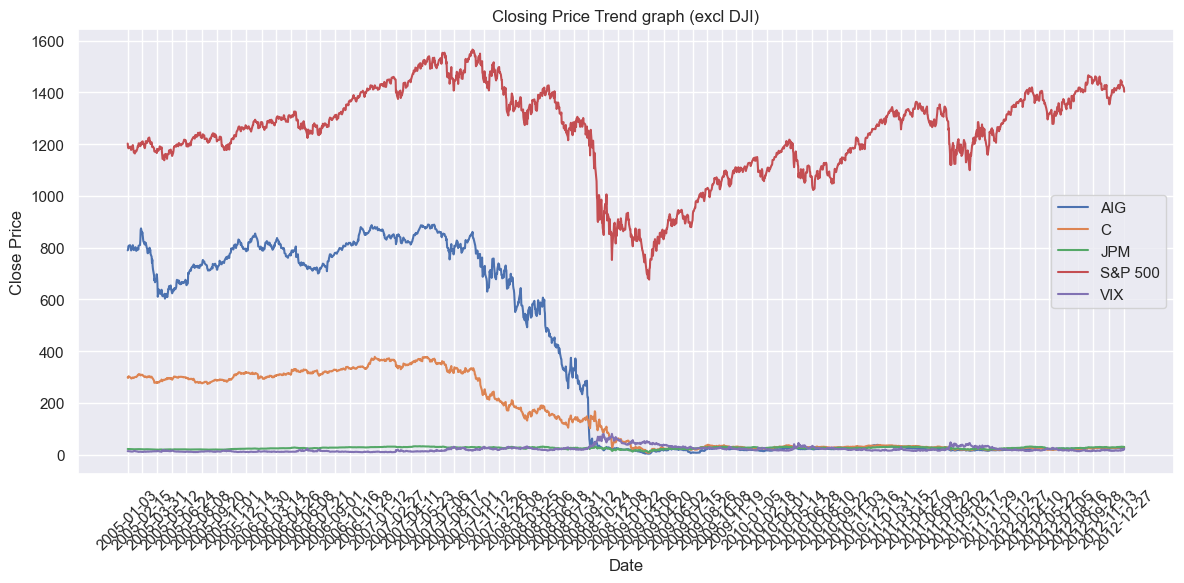

In [12]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=AIG_df,  x = "Date", y = "Close", label = "AIG")
sns.lineplot(data=C_df,    x = "Date", y = "Close", label = "C")
sns.lineplot(data=JPM_df,  x = "Date", y = "Close", label = "JPM")
# sns.lineplot(data=DJI_df,  x = "Date", y = "Close", label = "DJI")
sns.lineplot(data=GSPC_df, x = "Date", y = "Close", label = "S&P 500")
sns.lineplot(data=VIX_df,  x = "Date", y = "Close", label = "VIX")

dates = AIG_df["Date"]
plt.xticks(dates[::30], rotation=45)

plt.title("Closing Price Trend graph (excl DJI)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

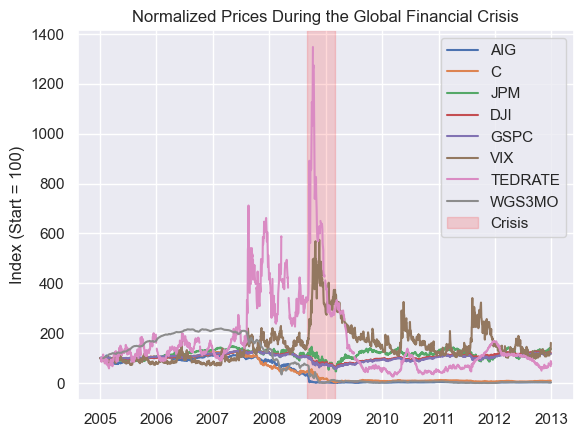

In [13]:
# time series
plt.figure()

for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Normalized"] = df["Close"] / df["Close"].iloc[0] * 100
    plt.plot(df["Date"], df["Normalized"], label=name)

plt.axvspan(
    pd.Timestamp("2008-09-01"),
    pd.Timestamp("2009-03-01"),
    color="red",
    alpha=0.15,
    label="Crisis"
)

plt.title("Normalized Prices During the Global Financial Crisis")
plt.ylabel("Index (Start = 100)")
plt.legend()
plt.show()

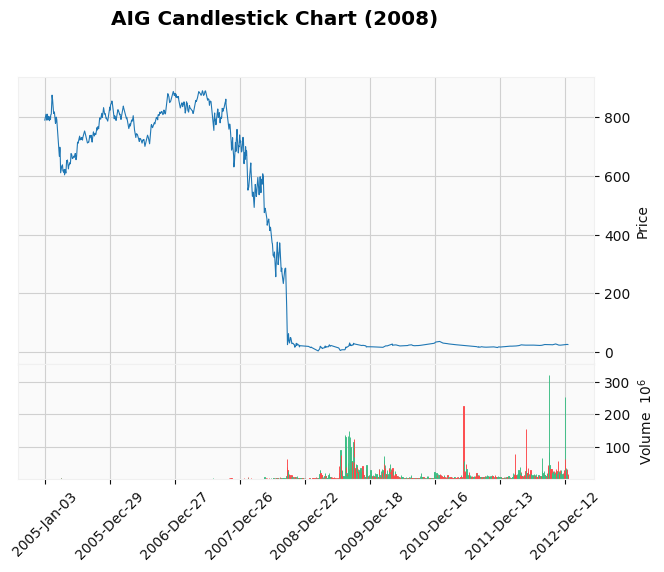

In [14]:
mplf.plot(
    AIG_df.set_index("Date"),
    type="line",
    volume=True,
    style="yahoo",
    title="AIG Candlestick Chart (2008)"
)

C:\Users\alden\AppData\Local\Temp\ipykernel_26832\3808308383.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Return"] = df["Close"].pct_change()


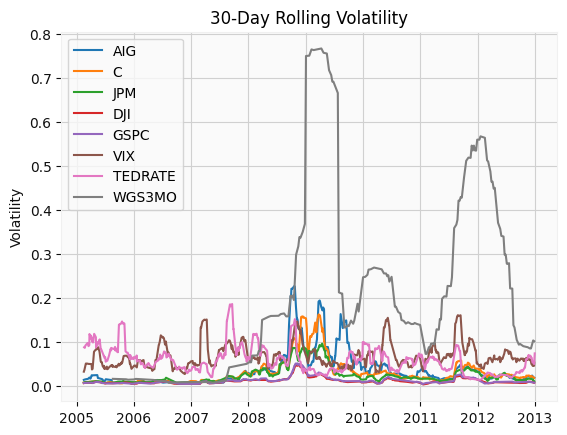

In [15]:
for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Return"] = df["Close"].pct_change()
    df["RollingVol"] = df["Return"].rolling(30).std()

    plt.plot(df["Date"], df["RollingVol"], label=name)

plt.title("30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.legend()
plt.show()  

## Compare price and volume of sales

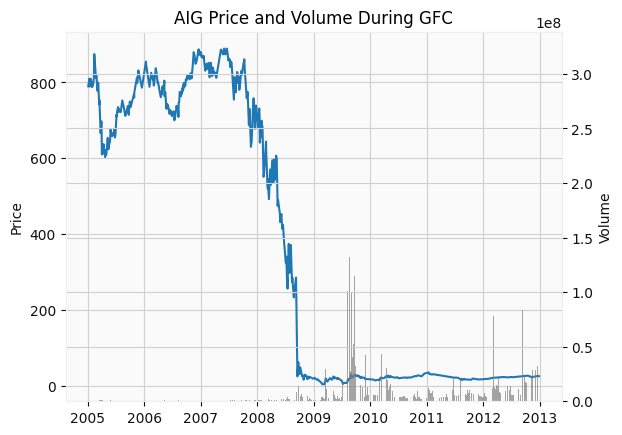

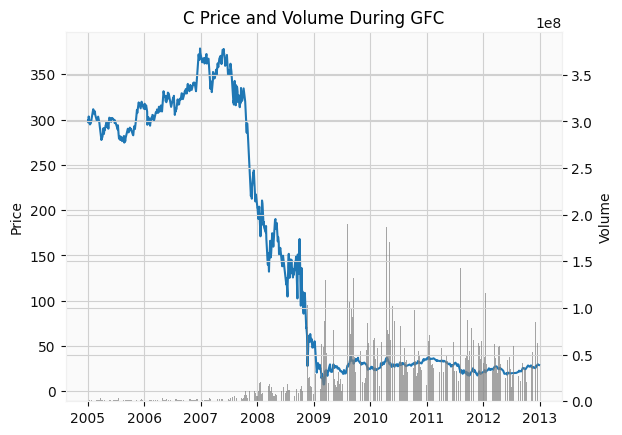

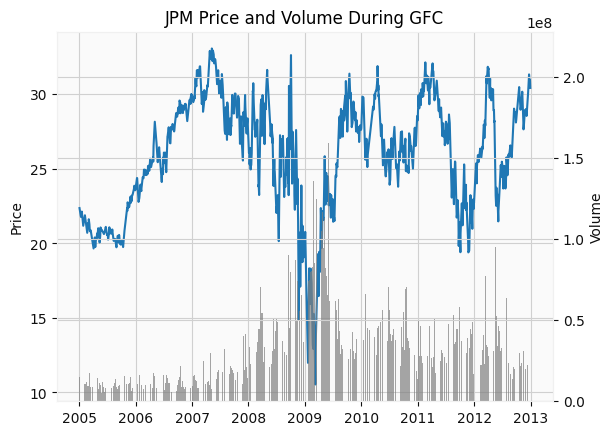

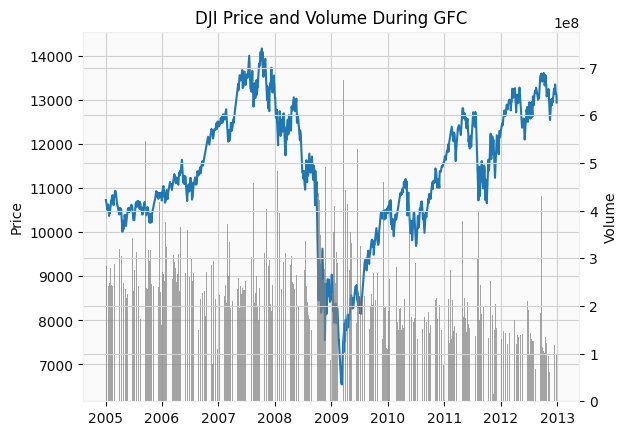

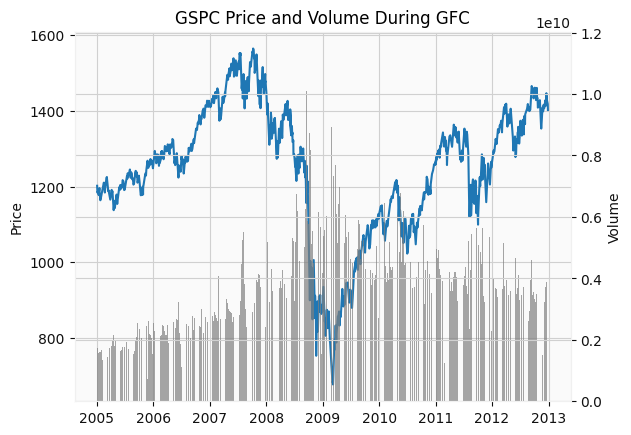

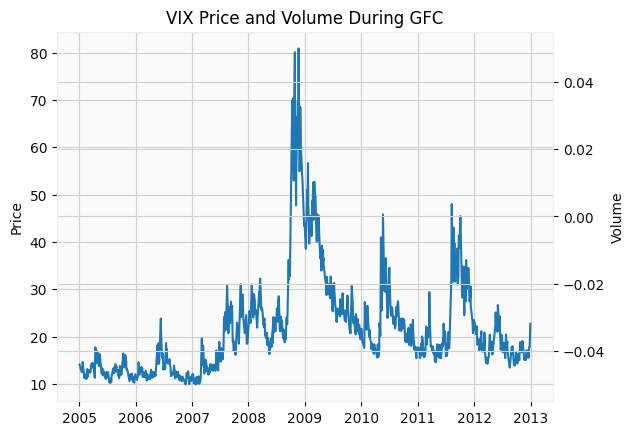

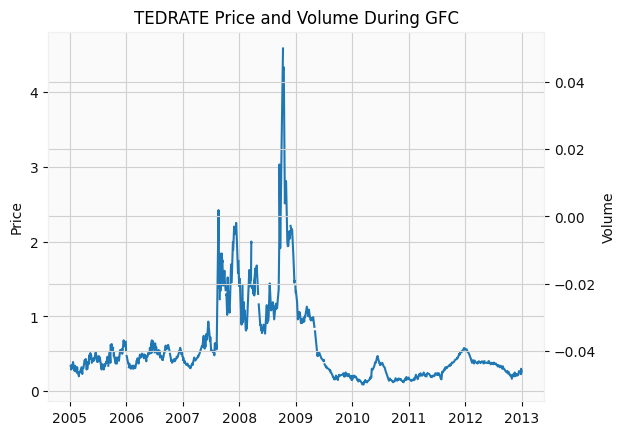

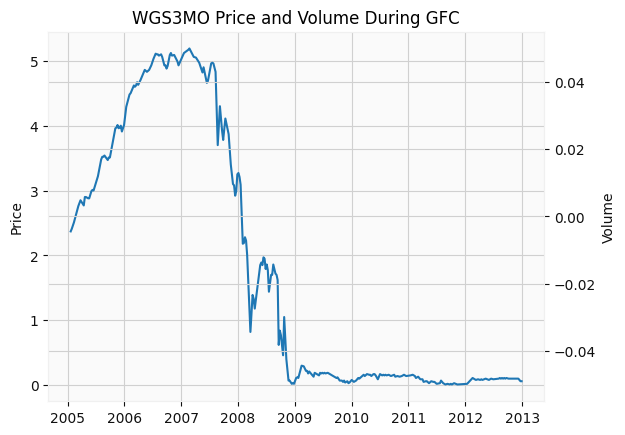

In [16]:
for name, df in allStocks.items():

    fig, ax1 = plt.subplots()

    ax1.plot(df["Date"], df["Close"], color="tab:blue")
    ax1.set_ylabel("Price")

    ax2 = ax1.twinx()
    ax2.bar(df["Date"], df["Volume"], alpha=0.7, color="gray")
    ax2.set_ylabel("Volume")

    plt.title(name + " Price and Volume During GFC")
    plt.show()

Drop from Jan 1 2007 to Lehman collapse: -15.81%
Change from RPF withdrawal to Jan 1 2009: -25.14%


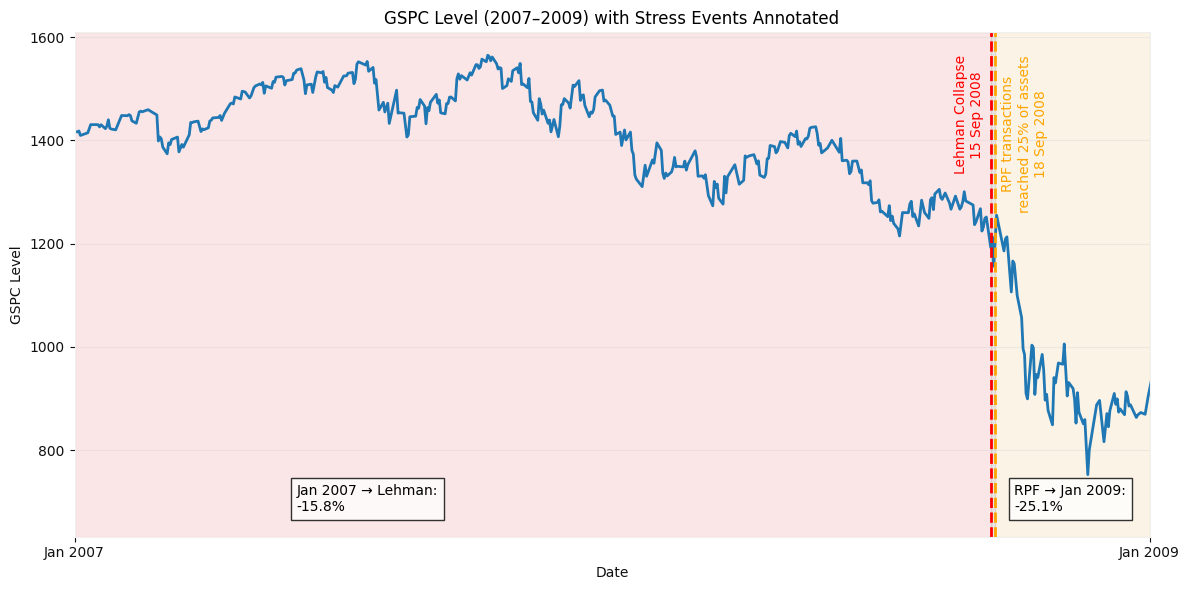

In [17]:
df = GSPC_df.copy()

start_2007 = pd.Timestamp("2007-01-01")
start_2009 = pd.Timestamp("2009-01-01")

lehman_collapse = pd.Timestamp("2008-09-15")
RPF_withdrawal  = pd.Timestamp("2008-09-18")

def get_price_at(date):
    return df.loc[(df["Date"] - date).abs().idxmin(), "Close"]

# Percentage drop calculations
price_2007   = get_price_at(start_2007)
price_lehman = get_price_at(lehman_collapse)
price_rpf    = get_price_at(RPF_withdrawal)
price_2009   = get_price_at(start_2009)

drop_2007_to_lehman = (price_lehman - price_2007) / price_2007 * 100
drop_rpf_to_2009    = (price_2009 - price_rpf) / price_rpf * 100

print(f"Drop from Jan 1 2007 to Lehman collapse: {drop_2007_to_lehman:.2f}%")
print(f"Change from RPF withdrawal to Jan 1 2009: {drop_rpf_to_2009:.2f}%")

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df["Date"], df["Close"], linewidth=2, label="GSPC Level")

ax.set_xlim(start_2007, start_2009)
ax.set_xlabel("Date")
ax.set_ylabel("GSPC Level")
ax.set_title("GSPC Level (2007–2009) with Stress Events Annotated")

ax.axvspan(start_2007, lehman_collapse, color="red", alpha=0.08)
ax.axvspan(lehman_collapse, RPF_withdrawal, color="grey", alpha=0.15)
ax.axvspan(RPF_withdrawal, start_2009, color="orange", alpha=0.08)

ax.axvline(lehman_collapse, linestyle="--", linewidth=2, color="red")
ax.axvline(RPF_withdrawal, linestyle="--", linewidth=2, color="orange")

# Event annotations
y_top = df["Close"].max()

ax.text(
    lehman_collapse - pd.Timedelta(days=15),
    y_top,
    "Lehman Collapse\n15 Sep 2008",
    color="red",
    fontsize=10,
    rotation=90,
    ha="center",
    va="top"
)

ax.text(
    RPF_withdrawal + pd.Timedelta(days=20),
    y_top,
    "RPF transactions\nreached 25% of assets\n18 Sep 2008",
    color="orange",
    fontsize=10,
    rotation=90,
    ha="center",
    va="top"
)

# Annotations for percentage drops
ax.text(
    pd.Timestamp("2007-06-01"),
    df["Close"].min() + 5,
    f"Jan 2007 → Lehman:\n{drop_2007_to_lehman:.1f}%",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.8)
)

ax.text(
    pd.Timestamp("2008-10-01"),
    df["Close"].min() + 5,
    f"RPF → Jan 2009:\n{drop_rpf_to_2009:.1f}%",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.8)
)

ax.set_xticks([start_2007, start_2009])
ax.set_xticklabels(["Jan 2007", "Jan 2009"])
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()



Shares put out in the market against time (13 Sep - 21 Sep)

The TED spread is used as a proxy for liquidity stress and investor withdrawal pressure. The sharp increase in the TED spread between 13 and 21 September 2008 reflects heightened counterparty risk following the collapse of Lehman Brothers, which coincided with significant redemptions from money market funds such as the Reserve Primary Fund.

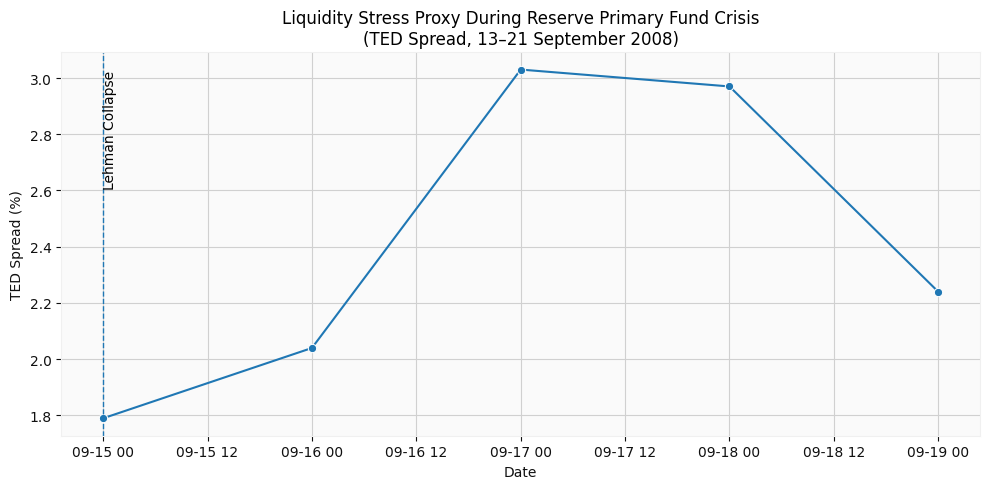

In [18]:
# Liquidity Stress Proxy During Reserve Primary Fund Crisis
ted_df = allStocks["TEDRATE"].copy()

start_date = "2008-09-13"
end_date = "2008-09-21"

ted_window = ted_df[
    (ted_df["Date"] >= start_date) & 
    (ted_df["Date"] <= end_date)
]

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=ted_window,
    x="Date",
    y="Close",
    marker="o"
)

plt.axvline(
    pd.to_datetime("2008-09-15"),
    linestyle="--",
    linewidth=1
)
plt.text(
    pd.to_datetime("2008-09-15"),
    ted_window["Close"].max(),
    "Lehman Collapse",
    rotation=90,
    verticalalignment="top"
)

plt.title(
    "Liquidity Stress Proxy During Reserve Primary Fund Crisis\n"
    "(TED Spread, 13–21 September 2008)"
)
plt.xlabel("Date")
plt.ylabel("TED Spread (%)")

plt.tight_layout()
plt.show()

NAV of reserve primary fund against time (13 Sep - 21 Sep)

The deterioration of the Reserve Primary Fund’s NAV during mid-September 2008 coincided with sharp increases in both the TED spread and the VIX, reflecting heightened counterparty risk and investor fear. These indicators jointly serve as proxies for the systemic stress that led to the fund breaking the buck.

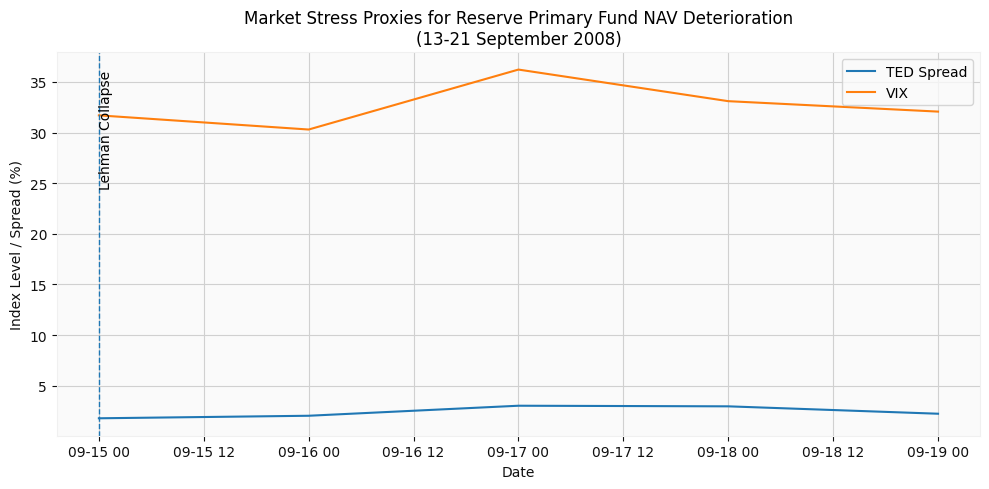

In [19]:
# Market Stress Proxies for Reserve Primary Fund NAV Deterioration
ted_df = allStocks["TEDRATE"].copy()
vix_df = allStocks["VIX"].copy()

start_date = "2008-09-13"
end_date = "2008-09-21"

ted_window = ted_df[(ted_df["Date"] >= start_date) & (ted_df["Date"] <= end_date)]
vix_window = vix_df[(vix_df["Date"] >= start_date) & (vix_df["Date"] <= end_date)]

plt.figure(figsize=(10, 5))

sns.lineplot(data=ted_window, x="Date", y="Close", label="TED Spread")
sns.lineplot(data=vix_window, x="Date", y="Close", label="VIX")

# Lehman event
plt.axvline(pd.to_datetime("2008-09-15"), linestyle="--", linewidth=1)
plt.text(pd.to_datetime("2008-09-15"),
         max(ted_window["Close"].max(), vix_window["Close"].max()),
         "Lehman Collapse",
         rotation=90,
         verticalalignment="top")

plt.title(
    "Market Stress Proxies for Reserve Primary Fund NAV Deterioration\n"
    "(13-21 September 2008)"
)
plt.xlabel("Date")
plt.ylabel("Index Level / Spread (%)")
plt.legend()

plt.tight_layout()
plt.show()


Shareholder Payout value (Left Y-axis) and Fed support (SEC, AMLF, Treasury $50billion) against time (2008 - 2014 )

Following the introduction of Federal Reserve and Treasury support measures in September 2008, financial market conditions gradually stabilised. This is reflected in the recovery of the S&P 500 over the subsequent years, which serves as a proxy for improving shareholder payout certainty and restored confidence in money market funds.

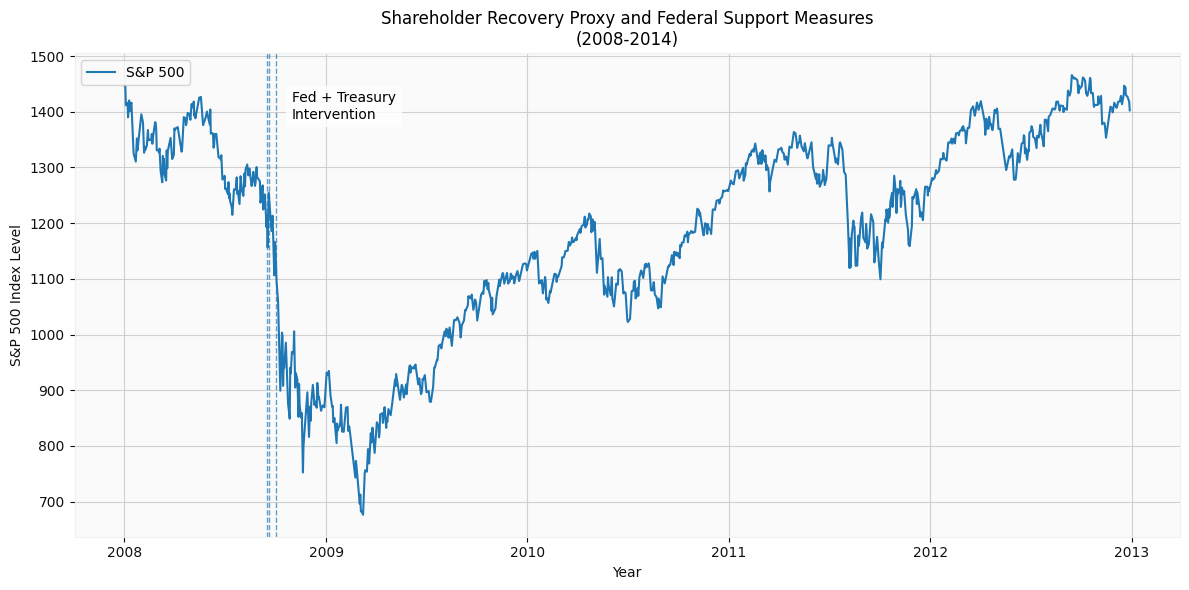

In [20]:
# Shareholder Recovery Proxy and Federal Support Measures
gspc_df = allStocks["GSPC"].copy()

start_date = "2008-01-01"
end_date = "2014-12-31"

gspc_window = gspc_df[
    (gspc_df["Date"] >= start_date) &
    (gspc_df["Date"] <= end_date)
]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(gspc_window["Date"], gspc_window["Close"], label="S&P 500", linewidth=1.5)
ax1.set_xlabel("Year")
ax1.set_ylabel("S&P 500 Index Level")
ax1.set_title(
    "Shareholder Recovery Proxy and Federal Support Measures\n"
    "(2008-2014)"
)

interventions = {
    "Lehman Collapse": "2008-09-15",
    "AMLF Introduced": "2008-09-19",
    "Treasury MMF Guarantee": "2008-09-19",
    "TARP Signed": "2008-10-03"
}

intervention_dates = [
    "2008-09-15",
    "2008-09-19",
    "2008-10-03"
]

for date in intervention_dates:
    ax1.axvline(
        pd.to_datetime(date),
        linestyle="--",
        linewidth=1,
        alpha=0.7
    )

y_max = gspc_window["Close"].max()

ax1.annotate(
    "Fed + Treasury\nIntervention",
    xy=(pd.to_datetime("2008-10-06"), y_max * 0.98),
    xytext=(10, 0),
    textcoords="offset points",
    fontsize=10,
    va="top",
    ha="left",
    bbox=dict(
        facecolor="white",
        edgecolor="none",
        alpha=0.8
    )
)

ax1.legend()
plt.tight_layout()
plt.show()
